In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df1=pd.read_csv("/content/drive/MyDrive/data set/loan.csv")

In [115]:
df2=pd.read_csv("/content/drive/MyDrive/data set/loan-test.csv")

In [116]:
for n in df1.columns:
  if n not in df2.columns:
    print(n)

Loan_Status


In [117]:
df=df1

In [118]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [119]:
df['Credit_History'].value_counts() #all columns are catagorical

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [120]:
#filling null value with mode
df=df.apply(lambda x:x.fillna(x.mode().iloc[0]))

#for filling null valu with mean/media . for mean and median formula is same .
# df.fillna(df.mean(),inplace=True)

In [121]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [123]:
df['Gender'].dtype

dtype('O')

start dinamic wise chatagorucal to label encoder (method-1)

In [124]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [125]:
for n in df.columns:
  if df[n].dtype==type(df[n]==str):
    df[n]=lb.fit_transform(df[n])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


End

manually convert chatagorical to label encoder (method-2)

In [126]:
# from sklearn.preprocessing import LabelEncoder

In [127]:
# lb=LabelEncoder()

In [128]:
#gender to numeic
# df['Gender']=lb.fit_transform(df['Gender'])

In [129]:
#Married to numeric
# df['Married']=df['Married'].replace({'No':0,'Yes':1})

In [130]:
#Education to numeric
# df['Education']=lb.fit_transform(df['Education'])

MODEL BUILDING

<Axes: >

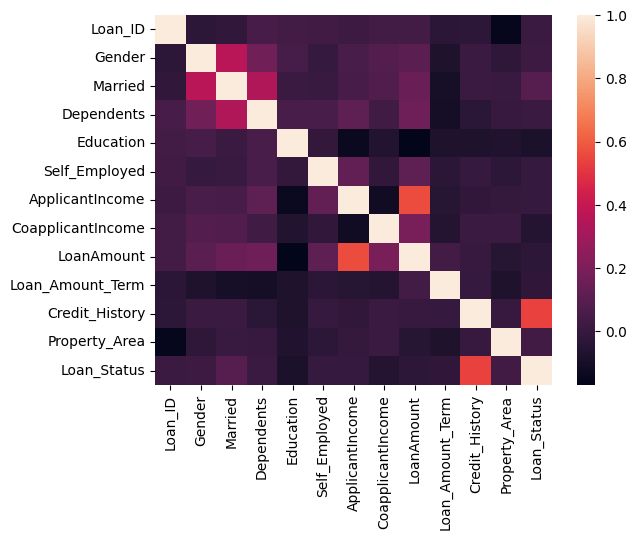

In [140]:
sns.heatmap(df.corr())

In [141]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [143]:
#x table(indipendent columns)
x=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
      'Loan_Amount_Term','Credit_History','Property_Area',]]

In [145]:
#y table (dependent column)
y=df[['Loan_Status']]

In [148]:
from sklearn.model_selection import  train_test_split

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lg=LogisticRegression()

In [158]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [160]:
lg.score(x_test,y_test)

0.8105906313645621

In [162]:
x_test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
288,0,0,0,0,0,4124,0.0,115.0,360.0,1.0,1
246,1,1,2,0,0,9703,0.0,112.0,360.0,1.0,2
548,0,0,0,0,0,5000,0.0,103.0,360.0,0.0,1
460,1,1,0,0,1,2083,4083.0,160.0,360.0,1.0,1
114,1,0,0,0,0,5050,0.0,118.0,360.0,1.0,1


In [163]:
y_test.head(5)

,Loan_Status
288,1
246,1
548,0
460,1
114,1


In [164]:
lg.predict([[0,0,0,0,0,4124,0.0,115.0,360.0,1.01]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [165]:
lg.predict([[1,1,0,0,1,2083,4083.0,160.0,360.0,1.0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [168]:
predicted=lg.predict(x_test)


In [169]:
y_test

,Loan_Status
288,1
246,1
548,0
460,1
114,1
...,...
295,1
370,1
273,1
156,1


In [194]:
#creating a new table with all predicted value and actualvalue
k=pd.DataFrame({'Actual':y_test['Loan_Status'],'Predicted':predicted})
k

,Actual,Predicted
288,1,1
246,1,1
548,0,0
460,1,1
114,1,1
...,...,...
295,1,1
370,1,1
273,1,1
156,1,1


by the help of confusion matix


In [198]:
#TP
TP=len(k[(k['Actual']==1)&(k['Predicted']==1)])

In [201]:
#TN
TN=len(k[(k['Actual']==0)&(k['Predicted']==0)])

In [203]:
#FP
FP=len(k[(k['Actual']==0)&(k['Predicted']==1)])

In [205]:
#FN
FN=len(k[(k['Actual']==1)&(k['Predicted']==0)])

In [207]:
#PRESICION
P=(TP)/TP+FP

In [208]:
#RECOIL OR SENCITIVITY
R=(TP)/TP+FN

In [210]:
#F-SCORE(NOT SQUIRE)
F=(2*P*R)/P+R

In [212]:
#ACCURACY
(TP+TN)/TP+TN+FP+FN

39.16470588235294

In [213]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy_score(k['Actual'],k['Predicted'])


0.8048780487804879